# CLASSIFICATION FOR PREDICTION ON BREAST CANCER COIMBRA

Pemeriksaan kanker payudara adalah strategi penting untuk mendeteksi dini dan memastikan probabilitas kesembuhan yang lebih baik dalam pengobatan. Model prediktif yang kuat berdasarkan data yang dapat dikumpulkan dalam konsultasi rutin dan analisis darah dicari untuk memberikan kontribusi penting dengan menawarkan lebih banyak alat skrining. 

## Tujuan

Penelitian ini bertujuan untuk mengevaluasi bagaimana model berbasis data yang dapat dikumpulkan dalam analisis rutin darah - terutama Glukosa, Insulin, HOMA, Leptin, Adiponektin, Resistin, MCP-1, Usia, dan Indeks Massa Tubuh (BMI) - dapat digunakan untuk memprediksi keberadaan kanker payudara.

In [ ]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns 
from matplotlib import pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier #

# DATA UNDERSTANDING

Data Understanding atau memahami data adalah sebuah tahapan di dalam metodologi sains data dan pengembangan AI yang bertujuan untuk mendapatkan pemahaman awal mengenai data yang dibutuhkan untuk memecahkan permasalahan yang diberikan. Pada kasus kali ini kita akan memahami Dataset Breast Cancer Coimbra.

## MENGUMPULKAN DATA

### Mencari Data

Tahapan pertama pada mengumpulkan data adalah dengan mencari dataset yang akan kita gunakan, sesuai penjelasan di atas kita akan menggunakan Dataset Breast Cancer Coimbra yang bersumber dari:

https://archive.ics.uci.edu/dataset/451/breast+cancer+coimbra

### Menarik data

In [ ]:
df = pd.read_excel('dataR2.xlsx')

df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


## MEMAHAMI DATA

### Deskripsi Data

dataset Breast Cancer Coimbra adalah kumpulan data yang digunakan dalam penelitian untuk membangun model prediktif terkait kanker payudara. Dataset ini terdiri dari informasi biokimia yang dikumpulkan dari sampel darah pasien, yang mencakup beberapa variabel penting seperti Glukosa, Insulin, HOMA (Homeostasis Model Assessment), Leptin, Adiponektin, Resistin, MCP-1 (Monocyte Chemoattractant Protein-1), serta usia dan Indeks Massa Tubuh (BMI).

Pada dataset ini terdapat 116 data.

### Penjelasan Fitur

- Age (years),  numerik: Usia pasien dalam tahun.

- BMI (kg/m2), numerik: Body Mass Index (BMI) adalah ukuran yang menggambarkan proporsi berat badan seseorang terhadap tinggi badannya. 

- Glucose (mg/dL), numerik: Glukosa adalah tingkat gula dalam darah pasien, diukur dalam miligram per desiliter (mg/dL). 

- Insulin (µU/mL), numerik: Insulin adalah hormon yang mengatur metabolisme glukosa dalam tubuh. 

- HOMA, numerik: Homeostasis Model Assessment (HOMA) adalah indeks yang digunakan untuk menilai resistensi insulin dan fungsi sel beta dalam pankreas.

- Leptin (ng/mL), numerik: Leptin adalah hormon yang diproduksi oleh jaringan lemak dan berperan dalam mengatur nafsu makan dan metabolisme energi

- Adiponectin (µg/mL), numerik: Adiponektin adalah hormon yang diproduksi oleh jaringan lemak yang berfungsi untuk mengatur metabolisme glukosa dan lipid.

- Resistin (ng/mL), numerik: Resistin adalah protein yang diproduksi oleh sel lemak dan berperan dalam peradangan dan resistensi insulin.

- MCP-1 (pg/dL), numerik: MCP-1 (Monocyte Chemoattractant Protein-1) adalah sitokin yang berperan dalam mengatur migrasi dan aktivasi sel monosit, yang merupakan bagian dari sistem kekebalan tubuh.

- Labels(Classification), numerik:
1=Healthy controls
2=Patients

## PLOTTING DATA

### Data Distribution

Age

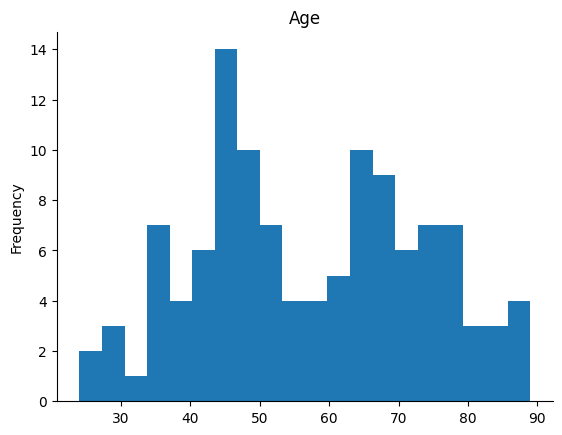

In [ ]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

BMI

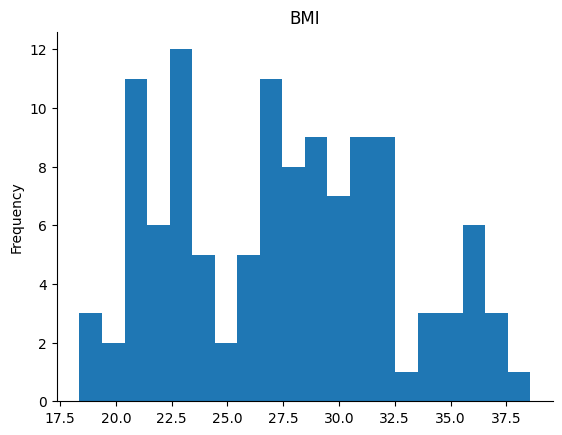

In [ ]:
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

Glucose

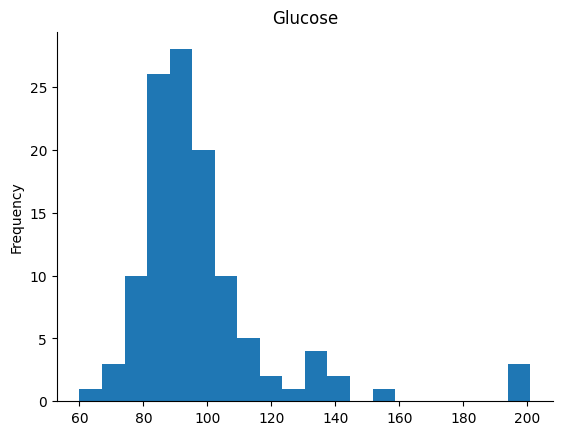

In [ ]:
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

Insulin

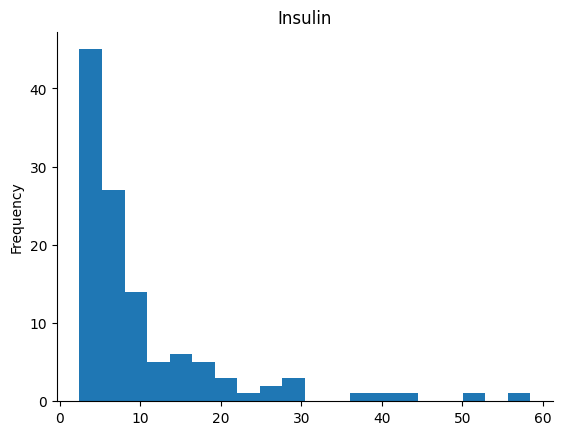

In [ ]:
df['Insulin'].plot(kind='hist', bins=20, title='Insulin')
plt.gca().spines[['top', 'right',]].set_visible(False)

HOMA

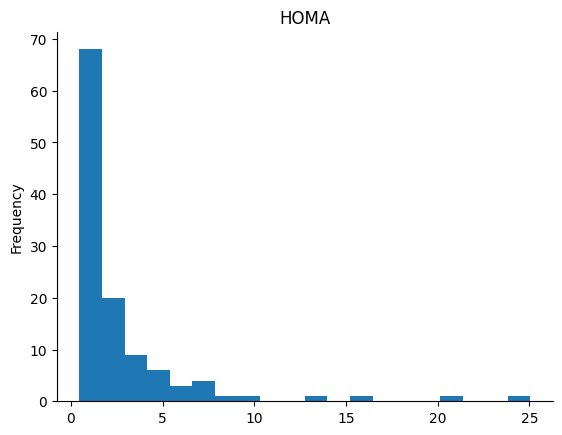

In [ ]:
df['HOMA'].plot(kind='hist', bins=20, title='HOMA')
plt.gca().spines[['top', 'right',]].set_visible(False)

Leptin

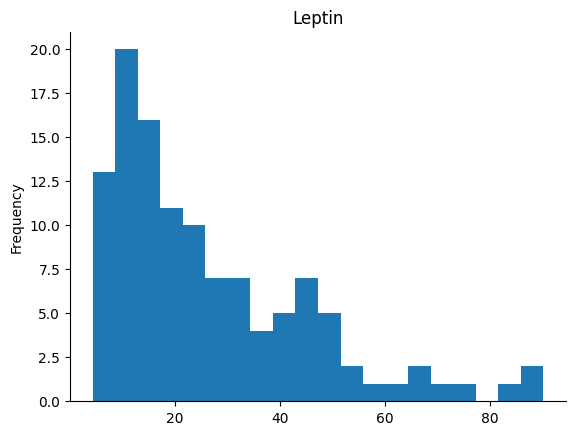

In [ ]:
df['Leptin'].plot(kind='hist', bins=20, title='Leptin')
plt.gca().spines[['top', 'right',]].set_visible(False)

Adiponectin

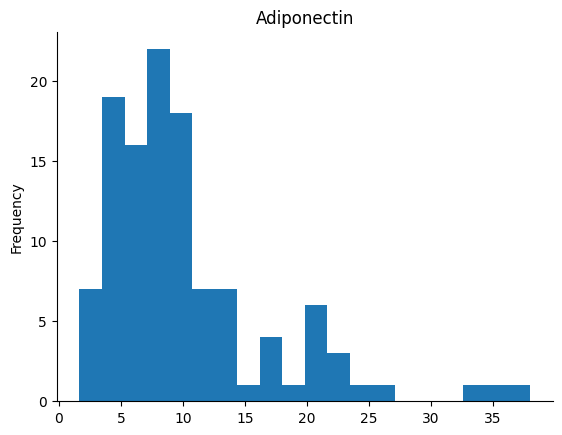

In [ ]:
df['Adiponectin'].plot(kind='hist', bins=20, title='Adiponectin')
plt.gca().spines[['top', 'right',]].set_visible(False)

Resistin

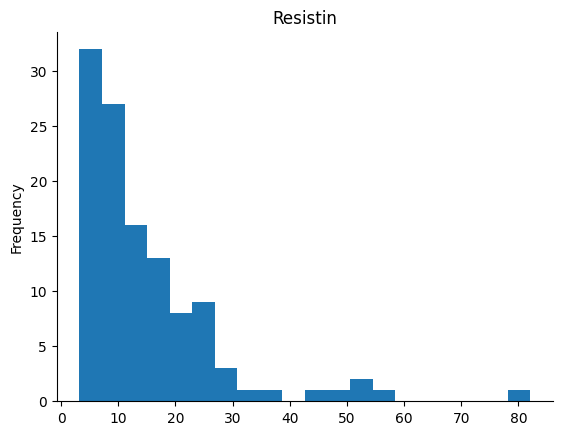

In [ ]:
df['Resistin'].plot(kind='hist', bins=20, title='Resistin')
plt.gca().spines[['top', 'right',]].set_visible(False)

MCP.1

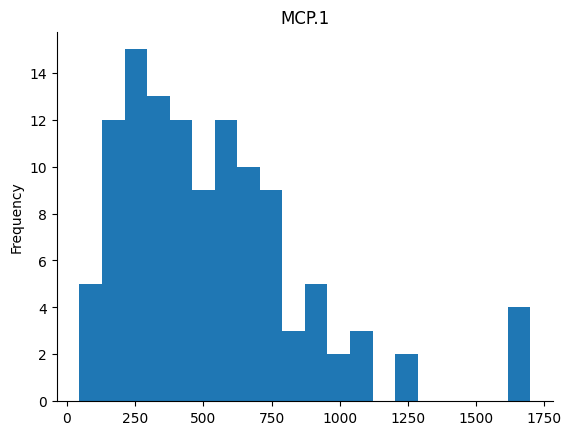

In [ ]:
df['MCP.1'].plot(kind='hist', bins=20, title='MCP.1')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 2D Distribution

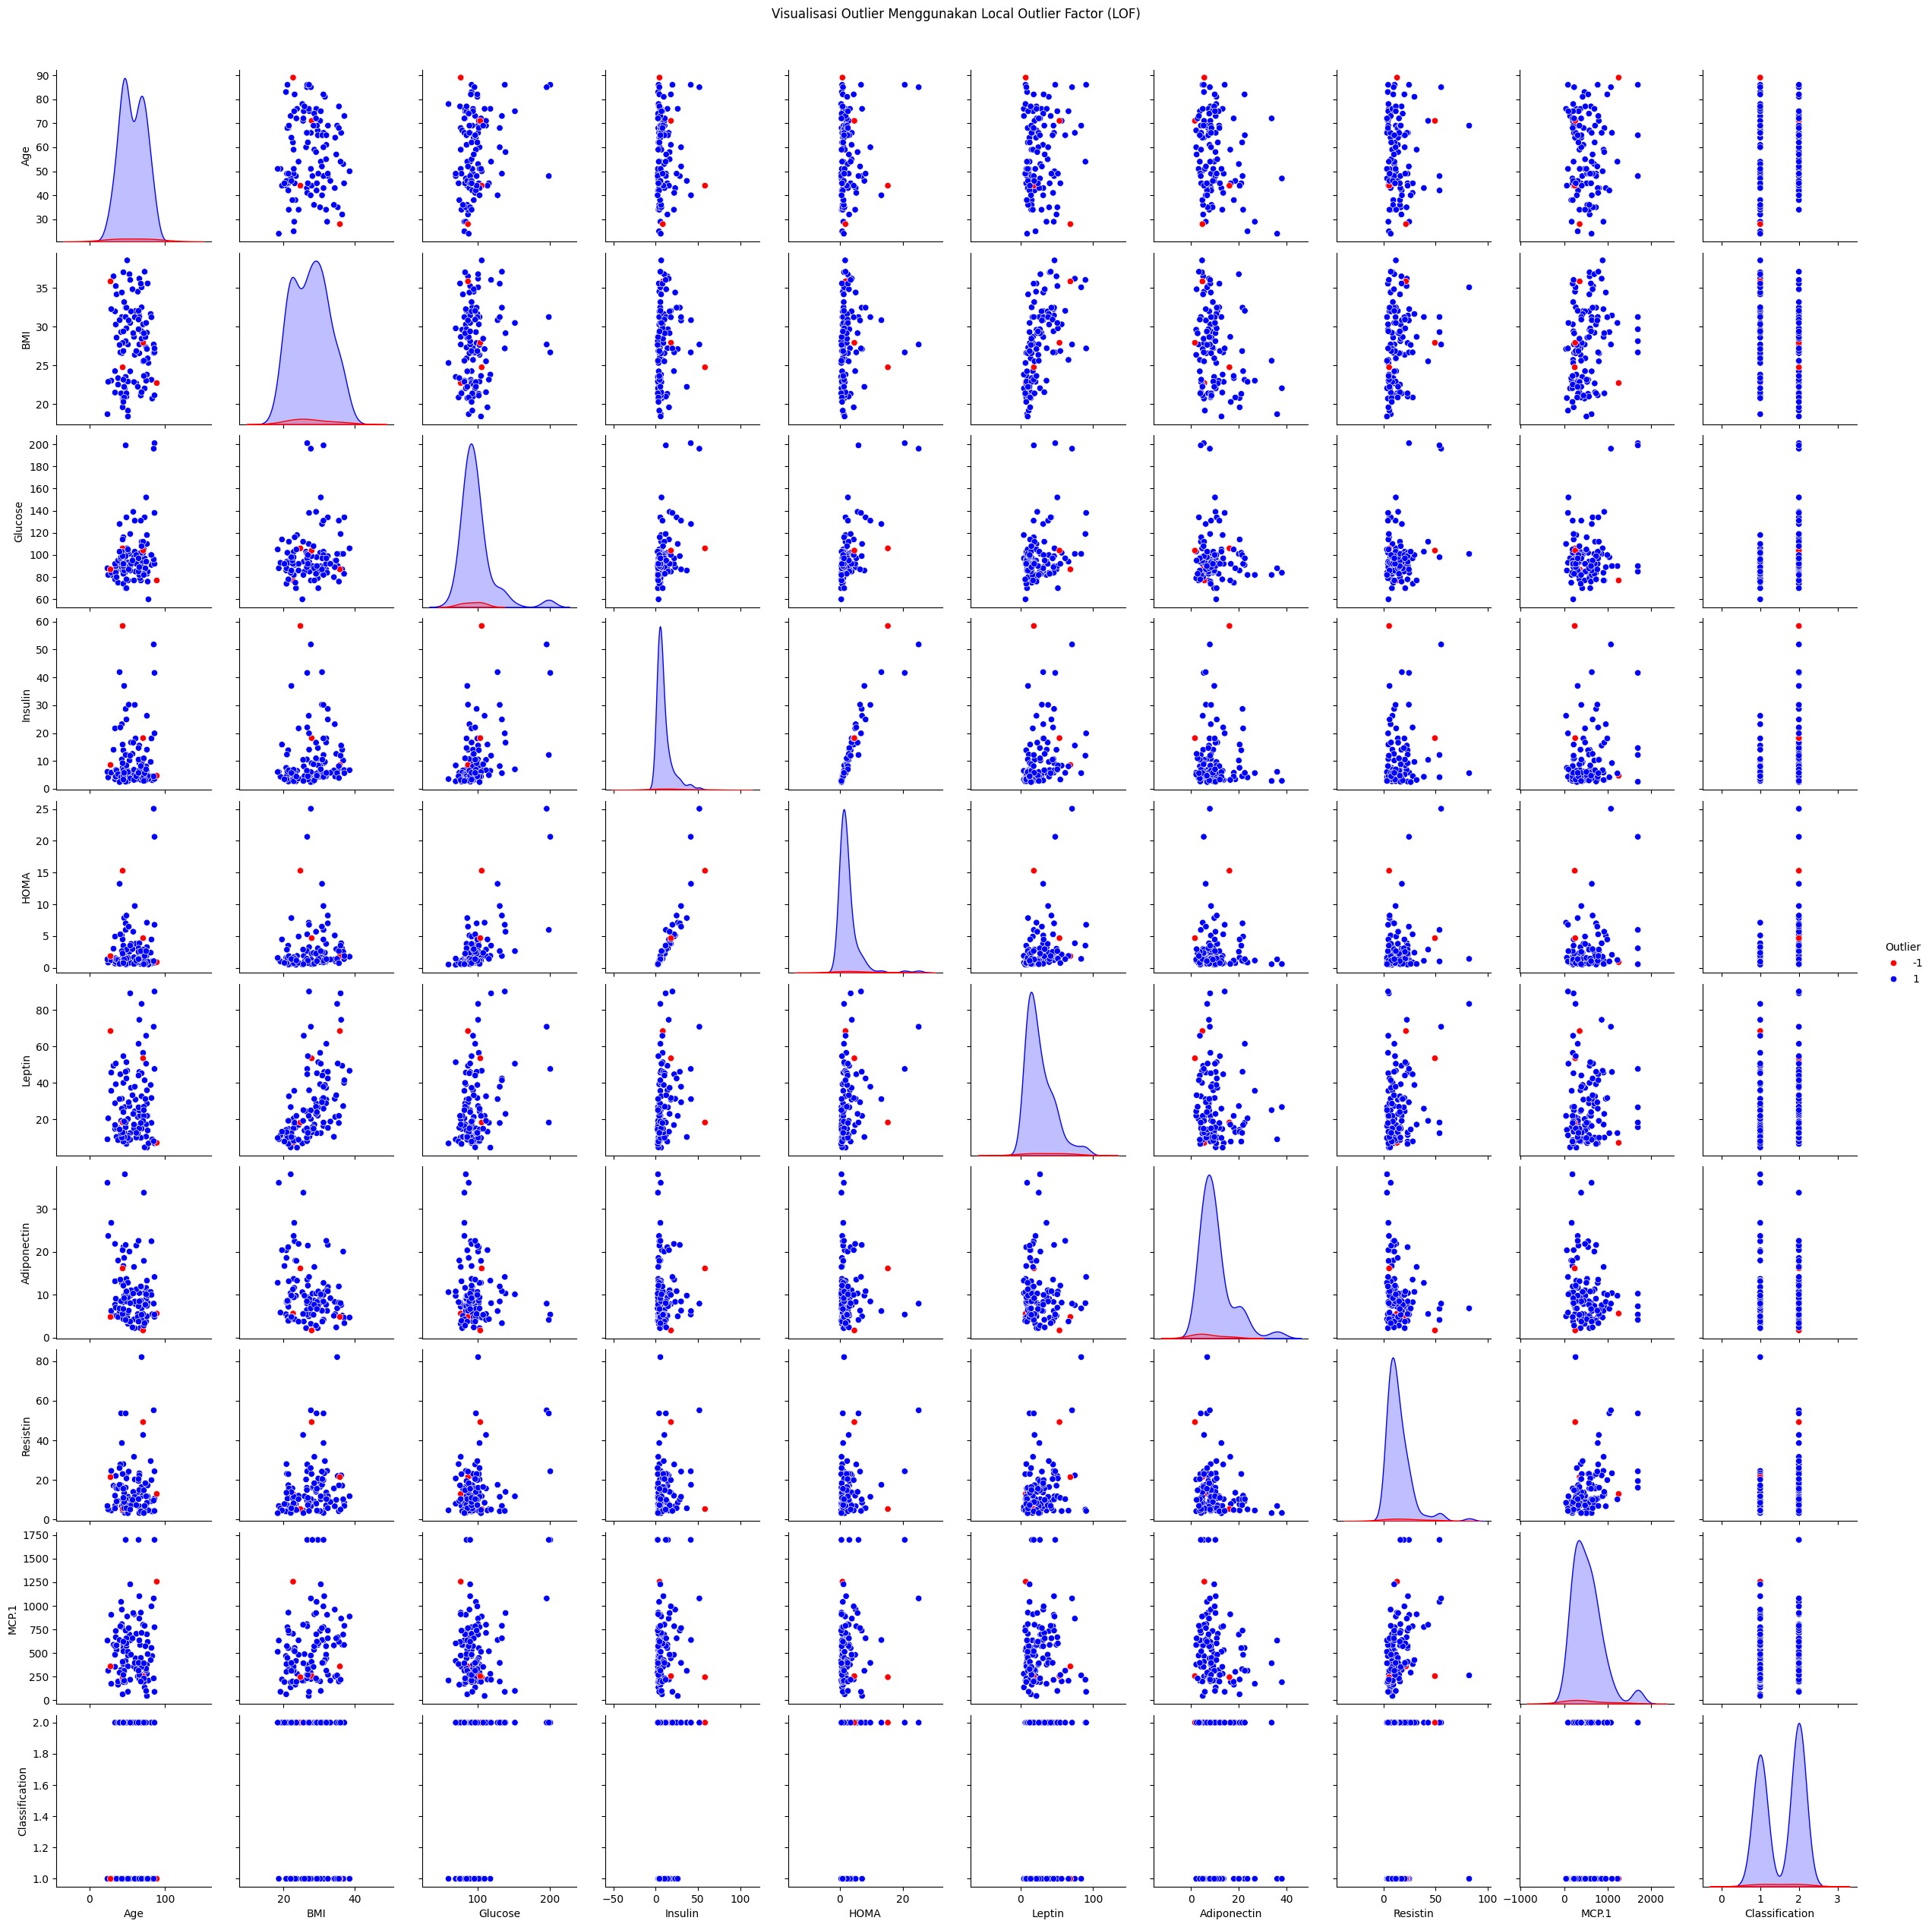

In [ ]:
# Asumsi df af_outliersalah DataFrame Anda dengan kolom-kolom yang relevan
# Mengonversi kolom yang dipilih menjadi array numpy
X = df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin' , 'MCP.1']].values

# Menerapkan Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=3)
y_pred = lof.fit_predict(X)

# Menambahkan prediksi outlier ke DataFrame
df['Outlier'] = y_pred

# Menampilkan plot pasangan (pair plot)
pair_plot = sns.pairplot(df, hue='Outlier', palette={1: 'blue', -1: 'red'}, diag_kind='auto')

# Menambahkan judul
pair_plot.fig.suptitle('Visualisasi Outlier Menggunakan Local Outlier Factor (LOF)', y=1.02)

# Menampilkan plot
plt.show()

## EKSPLORASI DATA

In [ ]:
df[['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin' , 'MCP.1']].describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000


## KUALITAS DATA

### Missing Value

Missing value adalah data yang hilang atau tidak tersedia dalam dataset.

In [ ]:
df.isnull().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
Outlier           0
dtype: int64

### Outlier Data

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data. Nilai ini muncul sebagai pengecualian dalam pola data yang ada.

Nilai yang ada di outlier bisa jauh lebih tinggi maupun lebih rendah dibandingkan dengan nilai-nilai lain dalam dataset. Outlier bisa terjadi karena berbagai alasan, termasuk kesalahan pengukuran, kejadian langka, atau karena faktor lain yang tidak terduga.

Mendeteksi outlier merupakan langkah penting dalam analisis data karena outlier memiliki dampak signifikan terhadap hasil analisis dan berpotensi menghasilkan kesimpulan yang tidak akurat.

Berikut beberapa alasan lain di balik pentingnya mendeteksi outlier:

1. Menghindari distorsi analisis

2. Memahami data dengan tepat

3. Memastikan analisis valid

4. Mendeteksi jika ada kesalahan atau kecurangan

Oleh karena itu, nantinya akan kita cek apakah ada data yang aneh atau tidak dengan menggunakan LOF (Local Outlier Factor)

# DATA PRE-PROCESSING

## Normalisasi Data

normalisasi data menggunakan MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Pisahkan fitur numerik
numeric_features = ['Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1']
df_numeric = df[numeric_features]

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data numerik
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Gabungkan kembali dengan kolom Classification
df_normalized['Classification'] = df['Classification']

df=pd.concat([df_normalized,])
# Tampilkan hasil normalisasi
print(df.head())


        Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0  0.369231  0.253850  0.070922  0.004908  0.000000  0.052299     0.221152   
1  0.907692  0.114826  0.226950  0.012190  0.009742  0.052726     0.103707   
2  0.892308  0.235278  0.219858  0.036874  0.022058  0.158526     0.571021   
3  0.676923  0.148328  0.120567  0.014171  0.005911  0.064811     0.151538   
4  0.953846  0.135640  0.226950  0.019936  0.013748  0.027782     0.086940   

   Resistin     MCP.1  Classification  
0  0.060665  0.224659               1  
1  0.010826  0.255926               1  
2  0.076906  0.307912               1  
3  0.121131  0.533934               1  
4  0.093375  0.440565               1  


## Local Outlier Factor

Konsep Local Outlier Factor

Local Outlier Factor (LOF) adalah metode yang digunakan dalam analisis data untuk mengidentifikasi observasi yang dianggap sebagai outlier berdasarkan konteks lokal atau lingkungan mereka. 
LOF memberikan skor untuk setiap data berdasarkan seberapa "aneh" atau tidak biasa data tersebut dibandingkan dengan tetangga-tetangganya.

Berikut adalah konsep utama dari LOF:

- Local Reachability Density (LRD):
Local Reachability Density (LRD) adalah ukuran kepadatan lokal dari sebuah data. Ini menunjukkan seberapa dekat sebuah data dengan tetangganya dalam ruang fitur. LRD didefinisikan sebagai kebalikan dari jarak rata-rata antara sebuah data dan tetangganya dalam k-NN. Semakin kecil jarak rata-rata, semakin besar LRD.

- Local Outlier Factor (LOF):
Local Outlier Factor (LOF) adalah rasio dari LRD sebuah data terhadap LRD dari tetangga-tetangganya. Ini mengukur seberapa jauh sebuah data dari tetangganya dalam hal kepadatan. Data dengan LOF yang tinggi cenderung menjadi outlier karena mereka memiliki kepadatan yang jauh lebih rendah dibandingkan dengan tetangga-tetangganya.

Proses utama dalam menghitung LOF melibatkan langkah-langkah berikut:

- Hitung jarak antara semua pasang data dalam ruang fitur dengan Euclidean Distance.


<img src="_images/image-20240626-233705.png" width="" align="left" />

- 
Temukan k tetangga terdekat untuk setiap data.

- Menghitung Reachability Distance (RD)

<img src="_images/image-20240626-233744.png" width="50%" align="left" />

- 
Hitung LRD untuk setiap data dengan menghitung kebalikan dari jarak rata-rata antara data dan tetangganya.

<img src="_images/image-20240626-233810.png" width="50%" align="left" />

- 
Hitung LOF untuk setiap data dengan membandingkan LRD dari data dengan LRD dari tetangga-tetangganya.

<img src="_images/image-20240626-233846.png" width="50%" align="left" />

## Check Outlier

In [ ]:
lof = LocalOutlierFactor(n_neighbors=5, p=2)

lof_predict = lof.fit_predict(df.drop(['Classification'], axis=1))

outlier = df.index[lof_predict == -1]

print("Index predicted table:", df.index[lof_predict == -1])



Index predicted table: Index([6, 37, 74, 78, 83, 87, 88, 98], dtype='int64')


In [ ]:
df.loc[outlier]

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
6,1.000000,0.214264,0.120567,0.040301,0.017222,0.030860,0.108120,0.123287,0.732326,1
37,0.692308,0.827498,0.290780,0.057364,0.038205,0.920926,0.141297,1.000000,0.131705,1
74,0.338462,0.190017,0.184397,0.615906,0.299753,0.068036,0.222735,0.031309,0.161054,2
78,0.953846,0.410548,1.000000,0.699275,0.820216,0.504089,0.101724,0.268223,1.000000,2
83,0.723077,0.353322,0.368794,0.142125,0.097807,0.171623,0.105268,0.501137,0.456285,2
87,0.938462,0.461126,0.964539,0.881381,1.000000,0.774365,0.171660,0.659213,0.624784,2
88,0.369231,0.637347,0.985816,0.173663,0.223835,0.160760,0.067285,0.639128,1.000000,2
98,0.723077,0.472346,0.312057,0.281431,0.170911,0.572168,0.000000,0.583494,0.127168,2


In [ ]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659,1
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926,1
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912,1
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934,1
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565,1
...,...,...,...,...,...,...,...,...,...,...
111,0.323077,0.419620,0.226950,0.016028,0.011727,0.585897,0.287049,0.098238,0.134568,2
112,0.584615,0.419125,0.283688,0.037446,0.026441,0.094674,0.543206,0.052098,0.172043,2
113,0.630769,0.676934,0.262411,0.058863,0.036757,0.664996,0.573988,0.090252,0.162294,2
114,0.738462,0.357271,0.156028,0.006925,0.004189,0.240191,0.882091,0.000761,0.209741,2


In [ ]:

df_replaced = df.copy()
for index in outlier:
    for column in df_replaced.drop(['Classification'], axis=1).columns:
        median_value = df_replaced[column].median()
        if df_replaced[column].dtype == 'int64':
            median_value = int(median_value)
        df_replaced.loc[index, column] = median_value
df=df_replaced        

print("Data after replacing outliers with median:")
print(df)


# for column in df.drop(['Classification'], axis=1).columns:
#     column_mean = df[column].mean()
    
#     if df[column].dtype == 'int64':
#         column_mean = int(column_mean)
    
#     df.loc[outlier, column] = column_mean

# df_cleaned = df.drop(outlier)
# df=df_cleaned
# print("Data after removing outliers:")
# print(df)



Data after replacing outliers with median:
          Age       BMI   Glucose   Insulin      HOMA    Leptin  Adiponectin  \
0    0.369231  0.253850  0.070922  0.004908  0.000000  0.052299     0.221152   
1    0.907692  0.114826  0.226950  0.012190  0.009742  0.052726     0.103707   
2    0.892308  0.235278  0.219858  0.036874  0.022058  0.158526     0.571021   
3    0.676923  0.148328  0.120567  0.014171  0.005911  0.064811     0.151538   
4    0.953846  0.135640  0.226950  0.019936  0.013748  0.027782     0.086940   
..        ...       ...       ...       ...       ...       ...          ...   
111  0.323077  0.419620  0.226950  0.016028  0.011727  0.585897     0.287049   
112  0.584615  0.419125  0.283688  0.037446  0.026441  0.094674     0.543206   
113  0.630769  0.676934  0.262411  0.058863  0.036757  0.664996     0.573988   
114  0.738462  0.357271  0.156028  0.006925  0.004189  0.240191     0.882091   
115  0.953846  0.435950  0.553191  0.311951  0.256680  1.000000     0.342293 

In [ ]:
df

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,0.369231,0.253850,0.070922,0.004908,0.000000,0.052299,0.221152,0.060665,0.224659,1
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926,1
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912,1
3,0.676923,0.148328,0.120567,0.014171,0.005911,0.064811,0.151538,0.121131,0.533934,1
4,0.953846,0.135640,0.226950,0.019936,0.013748,0.027782,0.086940,0.093375,0.440565,1
...,...,...,...,...,...,...,...,...,...,...
111,0.323077,0.419620,0.226950,0.016028,0.011727,0.585897,0.287049,0.098238,0.134568,2
112,0.584615,0.419125,0.283688,0.037446,0.026441,0.094674,0.543206,0.052098,0.172043,2
113,0.630769,0.676934,0.262411,0.058863,0.036757,0.664996,0.573988,0.090252,0.162294,2
114,0.738462,0.357271,0.156028,0.006925,0.004189,0.240191,0.882091,0.000761,0.209741,2


# DATA MODELLING

Membagi data (feature dan class)

Pada klasifikasi naive bayes gaussian kita memerlukan data train dan data test. Data train merupakan bagian dalam kumpulan dataset yang disediakan untuk menjadi bahan pembelajaran model agar model dapat menggeneralisasi (menemukan pola) data sehingga nantinya dapat digunakan untuk memprediksi data baru. Sedangkan data test adalah bagian dari kumpulan data set yang akan digunakan untuk mengetest dengan acuan prediksi dari data train yang digunakan. Untuk pembagian data nya sendiri adalah 30% menjadi data Test dan 70% menjadi data Train. Pada kode berikut random state dimulai dari 20.

In [ ]:
x = df.drop(['Classification'], axis=1)
y = df['Classification']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)

In [ ]:
x_train

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
50,0.800000,0.431991,0.354610,0.424413,0.270290,0.203178,0.090139,0.066979,0.000000
36,0.646154,0.636783,0.156028,0.031217,0.015387,0.138581,0.071765,0.001036,0.356263
84,0.276923,0.540700,0.269504,0.031056,0.022011,0.092483,0.138511,0.639646,0.602688
108,0.676923,0.850621,0.503546,0.102056,0.088115,0.157720,0.281552,0.012422,0.092313
46,0.784615,0.362714,0.241135,0.100789,0.057188,0.716712,0.057311,0.016312,0.097398
...,...,...,...,...,...,...,...,...,...
28,0.169231,0.835319,0.212766,0.078264,0.042548,0.538548,0.145967,0.238649,0.376429
95,0.384615,0.564497,0.070922,0.106447,0.039959,0.547031,0.249443,0.222563,0.336829
15,0.307692,0.118266,0.184397,0.091401,0.046072,0.113750,0.512972,0.056154,0.010751
90,0.246154,0.616888,0.482270,0.704326,0.519056,0.310897,0.123818,0.181836,0.358477


In [ ]:
x_test

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
88,0.481010,0.460412,0.226950,0.063306,0.037163,0.186332,0.185100,0.095330,0.257101
56,0.276923,0.147951,0.234043,0.010120,0.008972,0.171825,0.187085,0.179568,0.167056
60,0.215385,0.204349,0.248227,0.050493,0.031136,0.048006,0.085639,0.158779,0.092710
47,0.830769,0.342921,0.000000,0.019205,0.002106,0.027010,0.244923,0.018428,0.099181
51,0.815385,0.372611,0.177305,0.038338,0.020049,0.109679,0.222550,0.108556,0.268054
5,0.384615,0.221907,0.226950,0.014171,0.010767,0.029321,0.330468,0.090095,0.293215
53,0.323077,0.121729,0.099291,0.037981,0.014845,0.040037,0.180887,0.314644,0.203989
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926
91,0.892308,0.635738,0.283688,0.279235,0.162372,0.317955,0.227233,0.212155,0.573929
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912


In [ ]:
y_train

50     1
36     1
84     2
108    2
46     1
      ..
28     1
95     2
15     1
90     2
99     2
Name: Classification, Length: 81, dtype: int64

In [ ]:
y_test

88     2
56     2
60     2
47     1
51     1
5      1
53     2
1      1
91     2
2      1
39     1
66     2
35     1
73     2
104    2
82     2
48     1
94     2
81     2
86     2
37     1
102    2
55     2
69     2
12     1
0      1
38     1
23     1
70     2
111    2
109    2
49     1
44     1
31     1
19     1
Name: Classification, dtype: int64

Menggabungkan data x dan y

In [ ]:
df_train = pd.concat([x_train, y_train], axis=1, join='inner')
df_test = pd.concat([x_test, y_test], axis=1, join='inner')

df_test

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
88,0.481010,0.460412,0.226950,0.063306,0.037163,0.186332,0.185100,0.095330,0.257101,2
56,0.276923,0.147951,0.234043,0.010120,0.008972,0.171825,0.187085,0.179568,0.167056,2
60,0.215385,0.204349,0.248227,0.050493,0.031136,0.048006,0.085639,0.158779,0.092710,2
47,0.830769,0.342921,0.000000,0.019205,0.002106,0.027010,0.244923,0.018428,0.099181,1
51,0.815385,0.372611,0.177305,0.038338,0.020049,0.109679,0.222550,0.108556,0.268054,1
5,0.384615,0.221907,0.226950,0.014171,0.010767,0.029321,0.330468,0.090095,0.293215,1
53,0.323077,0.121729,0.099291,0.037981,0.014845,0.040037,0.180887,0.314644,0.203989,2
1,0.907692,0.114826,0.226950,0.012190,0.009742,0.052726,0.103707,0.010826,0.255926,1
91,0.892308,0.635738,0.283688,0.279235,0.162372,0.317955,0.227233,0.212155,0.573929,2
2,0.892308,0.235278,0.219858,0.036874,0.022058,0.158526,0.571021,0.076906,0.307912,1


## GAUSSIAN NAIVE BAYES CLASSIFICATION

Gaussian Naive Bayes merupakan teknik klasisifkasi yang digunakan dalam machine learning dengan menggunakan metode probability dan distribusi gaussian atau distribusi normal. Pada distribusi gaussian tiap fitur data memiliki pengaruh yang independent dalam meprediksi target. Prediksi akhir didapat dari kombinasi predikasi seluruh parameter dengan probability dari target yang diklasifikasikan kedalam dua kelas. Klasifikasi akhirnya adalah hasil probability yang lebih tinggi dari group target.

Tujuan metode ini adalah mengklasifikasikan probabilitas berdasarkan pembelajaran mesin atas probabilitas lain. 

<img src="_images/image-20240626-234541.png" width="" align="left" />

Di mana, 
P(A|B) = peluang terjadinya kejadian A jika kejadian B telah terjadi. Perhatikan bahwa “|” mengacu pada “diberikan.”
P(A) = peluang terjadinya kejadian A.
P(B) = peluang terjadinya kejadian B.
P(B|A) = peluang terjadinya kejadian B, jika diketahui kejadian A telah terjadi.

Untuk menghitung likehoodnya sendiri kita bisa memakai rumus distribusi normal

<img src="_images/image-20240626-234613.png" width="" align="left" />

Dengan:
f(x) = fungsi kontinu atau fungsi kepadatan peluang;
σ = simpangan baku (standar deviasi);
μ = nilai rata-rata;
π = 3,14; dan
e = Eksponen

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

result = classifier.predict(x_test)

classifier.score(x_test, y_test)

0.6857142857142857

In [ ]:
print(classifier.predict_proba(x_test))

[[8.18743456e-01 1.81256544e-01]
 [7.15812584e-01 2.84187416e-01]
 [8.47121275e-01 1.52878725e-01]
 [5.88321355e-01 4.11678645e-01]
 [9.32801000e-01 6.71990004e-02]
 [7.91447168e-01 2.08552832e-01]
 [9.00506026e-02 9.09949397e-01]
 [9.57349312e-01 4.26506883e-02]
 [1.02958477e-01 8.97041523e-01]
 [9.86566181e-01 1.34338192e-02]
 [9.33759930e-01 6.62400700e-02]
 [8.34478539e-01 1.65521461e-01]
 [9.16406786e-01 8.35932142e-02]
 [7.36873058e-01 2.63126942e-01]
 [8.25749661e-01 1.74250339e-01]
 [2.76890166e-05 9.99972311e-01]
 [8.89259976e-01 1.10740024e-01]
 [2.16081313e-13 1.00000000e+00]
 [1.17280183e-01 8.82719817e-01]
 [8.33211532e-01 1.66788468e-01]
 [8.18470723e-01 1.81529277e-01]
 [5.04921847e-01 4.95078153e-01]
 [1.17568773e-01 8.82431227e-01]
 [2.25305265e-02 9.77469474e-01]
 [9.95855391e-01 4.14460888e-03]
 [6.72189576e-01 3.27810424e-01]
 [3.13855857e-01 6.86144143e-01]
 [9.22482347e-01 7.75176527e-02]
 [8.94531202e-01 1.05468798e-01]
 [8.66761717e-01 1.33238283e-01]
 [9.124617

## KNN

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=8)

classifier.fit(x_train, y_train)

result = classifier.predict(x_test)

classifier.score(x_test, y_test)

0.7142857142857143

# ENSEMBLE LEARNING

## Stacking Classifier

<img src="_images/image-20240623-202756.png" width="50%" align="" />

### Make KNN model with n = 7

In [ ]:
clf_n_7 = KNeighborsClassifier(n_neighbors=7)

clf_n_7.fit(x_train, y_train)

# joblib.dump(clf_n_7, 'stacking/knn_7.joblib')

result = clf_n_7.predict(x_train)

result_n_7 = pd.DataFrame(result, columns=['P1'])

result_n_7

,P1
0,1
1,1
2,2
3,2
4,1
...,...
76,1
77,2
78,1
79,2


### Make KNN model with n = 8

In [ ]:
clf_n_8 = KNeighborsClassifier(n_neighbors=8)

clf_n_8.fit(x_train, y_train)

# joblib.dump(clf_n_8, 'stacking/knn_8.joblib')

result = clf_n_8.predict(x_train)

result_n_8 = pd.DataFrame(result, columns=['P2'])

result_n_8

,P2
0,1
1,1
2,2
3,1
4,1
...,...
76,1
77,1
78,1
79,2


In [ ]:
X = pd.concat([result_n_7, result_n_8], axis=1)

X

,P1,P2
0,1,1
1,1,1
2,2,2
3,2,1
4,1,1
...,...,...
76,1,1
77,2,1
78,1,1
79,2,2


### Modelling Gaussian Naives Bayes as Meta Classifiers

In [ ]:
clf_nb = GaussianNB()

clf_nb.fit(X, y_train)

# joblib.dump(clf_nb, 'stacking/meta_clf.joblib')

train_accuracy = clf_nb.score(X, y_train)
print(f"Training Accuracy: {train_accuracy}")
joblib.dump(train_accuracy, 'stacking/accuracy.joblib')

Training Accuracy: 0.8148148148148148


['stacking/accuracy.joblib']

In [ ]:
def stackingClassifier(data):
    result_n_7 = pd.DataFrame(clf_n_7.predict(data), columns=['P1'])
    result_n_8 = pd.DataFrame(clf_n_8.predict(data), columns=['P2'])
    data = pd.concat([result_n_7, result_n_8], axis=1)

    return clf_nb.predict(data), clf_nb.score(X, y_train)

In [ ]:
data = df_test.head(1).drop('Classification', axis=1)
prediction, score = stackingClassifier(data)
print(f'prediction : {prediction}, accuration : {score}')

prediction : [2], accuration : 0.8148148148148148


## Bagging Classifier

<img src="_images/image-20240623-204426.png" width="50%" align="" />

### Make bootstrap sample data

In [ ]:
B1 = df_train.sample(frac=1)

B1

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
76,0.476923,0.673224,0.226950,0.253498,0.134550,0.382840,0.257323,0.050135,0.264755,2
32,0.061538,0.865259,0.191489,0.109659,0.055852,0.746772,0.086252,0.231128,0.189266,1
50,0.800000,0.431991,0.354610,0.424413,0.270290,0.203178,0.090139,0.066979,0.000000,1
79,0.261538,0.410850,0.262411,0.349843,0.195435,0.469878,0.325386,0.312112,0.446541,2
85,0.630769,0.558993,0.177305,0.218052,0.105927,0.258298,0.154652,0.206024,1.000000,2
...,...,...,...,...,...,...,...,...,...,...
43,0.692308,0.699202,0.234043,0.053509,0.031657,0.126022,0.278473,0.108733,0.135725,1
107,0.338462,0.732851,0.226950,0.059220,0.034067,0.167258,0.206244,0.071999,0.098843,2
84,0.276923,0.540700,0.269504,0.031056,0.022011,0.092483,0.138511,0.639646,0.602688,2
90,0.246154,0.616888,0.482270,0.704326,0.519056,0.310897,0.123818,0.181836,0.358477,2


In [ ]:
B2 = df_train.sample(frac=1)

B2

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
89,0.523077,0.533656,0.560284,0.252552,0.212261,0.216094,0.236550,0.136443,0.531311,2
62,0.384615,0.148328,0.127660,0.003712,0.001649,0.023531,0.061294,0.250127,0.418631,2
9,0.784615,0.229109,0.163121,0.044978,0.022228,0.149077,0.272729,0.049199,0.164867,1
10,0.153846,0.153399,0.127660,0.018509,0.008137,0.119334,0.314808,0.047028,0.186831,1
29,0.184615,0.782081,0.141844,0.074213,0.033886,0.069442,0.093720,0.158599,0.324017,1
...,...,...,...,...,...,...,...,...,...,...
83,0.481731,0.460392,0.226950,0.063394,0.037169,0.186299,0.185033,0.095409,0.257173,2
17,0.569231,0.676388,0.177305,0.279235,0.135164,0.307807,0.168322,0.132766,0.241167,1
26,0.400000,1.000000,0.326241,0.076230,0.052280,0.492376,0.082773,0.108681,0.509088,1
107,0.338462,0.732851,0.226950,0.059220,0.034067,0.167258,0.206244,0.071999,0.098843,2


In [ ]:
B3 = df_train.sample(frac=1)

B3

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
20,0.184615,0.505062,0.184397,0.034144,0.018481,0.125787,0.190853,0.075344,0.295523,1
79,0.261538,0.410850,0.262411,0.349843,0.195435,0.469878,0.325386,0.312112,0.446541,2
78,0.482692,0.460310,0.226950,0.063512,0.037177,0.186429,0.184944,0.095514,0.257269,2
98,0.481130,0.460402,0.226950,0.063291,0.037162,0.186348,0.185111,0.095317,0.257089,2
30,0.646154,0.882898,0.290780,0.233830,0.138404,0.818852,0.161707,0.242239,0.495659,1
...,...,...,...,...,...,...,...,...,...,...
72,0.415385,0.000000,0.319149,0.064218,0.044517,0.061755,0.305189,0.000000,0.283080,2
34,0.415385,0.461126,0.120567,0.025398,0.010771,0.183566,0.042218,0.090825,0.258996,1
107,0.338462,0.732851,0.226950,0.059220,0.034067,0.167258,0.206244,0.071999,0.098843,2
28,0.169231,0.835319,0.212766,0.078264,0.042548,0.538548,0.145967,0.238649,0.376429,1


### Modelling with Naives Bayes

In [ ]:
B1_x = B1.drop(['Classification'], axis=1)
B1_y = B1['Classification']

M1 = GaussianNB()
M1.fit(B1_x, B1_y)

# saving model with joblib
# joblib.dump(M1, 'bagging/m1.joblib')

M1_predict = M1.predict(x_train)

M1_result = pd.DataFrame(M1_predict, columns=['P1'])

# M1.score(x_test, y_test)

In [ ]:
B2_x = B2.drop(['Classification'], axis=1)
B2_y = B2['Classification']

M2 = GaussianNB()
M2.fit(B2_x, B2_y)

# joblib.dump(M2, 'bagging/m2.joblib')

M2_predict = M2.predict(x_train)

M2_result = pd.DataFrame(M2_predict, columns=['P2'])

# M2.score(x_test, y_test)

In [ ]:
B3_x = B3.drop(['Classification'], axis=1)
B3_y = B3['Classification']

M3 = GaussianNB()
M3.fit(B3_x, B3_y)

# saving model with joblib
# joblib.dump(M3, 'bagging/m3.joblib')

M3_predict = M3.predict(x_train)

M3_result = pd.DataFrame(M3_predict, columns=['P3'])

# M3.score(x_test, y_test)

In [ ]:
X = pd.concat([M1_result, M2_result, M3_result], axis=1)
X

,P1,P2,P3
0,2,2,2
1,1,1,1
2,2,2,2
3,2,2,2
4,1,1,1
...,...,...,...
76,1,1,1
77,2,2,2
78,1,1,1
79,2,2,2


### Make aggregation

In [ ]:
clf_knn = KNeighborsClassifier(n_neighbors=8)

clf_knn.fit(X, y_train)

# saving model with joblib
# joblib.dump(clf_knn, 'bagging/aggregation.joblib')

# result = clf_nb.predict(x_train)
# result

clf_knn.score(X, y_train)

0.6790123456790124

# EVALUASI

Dari beberapa tahapan pengerjaan yang telah kita lalui, kami mendapatkan kesimpulan bahwa hasil yang terbaik untuk di bawa ke tahapan selanjutnya adalah dengan menggunakan model dari stacking.

Dapat dilihat kembali hasil akurasi stacking lebih tinggi daripada akurasi bagging, yaitu akurasi stacking adalah 0.8148148148148148 sedangkan akurasi bagging adalah 0.6790123456790124

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e8bb9852-4c8f-4ed5-a6ea-7c9a6859bf06' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>